<br><br>

<h1 class="tasks">Task 8-1 Solution: Linear Regression & Predicting Batting Average Given Hits</h1>

<br>

In [30]:
%%HTML
<style type="text/css">
    .tasks { color: red; }
    .task { color: blue; }
    .example { color: green; }
</style>

In [31]:
import sqlite3
import warnings

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression

sns.set()

warnings.filterwarnings('ignore')
np.set_printoptions(precision=3, suppress=True)

pd.set_option('max_rows', 150)

%matplotlib inline

In [32]:
df = pd.read_csv('../../resources/baseball/Batting.csv', usecols=(6, 8))
df.columns = ['atbats', 'hits']
df['avgs'] = df['hits'] / df['atbats']
df = df.loc[(df['atbats'] >= 502)]
print(df.shape)
df.head()

(8561, 3)


,atbats,hits,avgs
2141,521.0,161.0,0.309021
2316,518.0,139.0,0.268340
3103,504.0,187.0,0.371032
3120,522.0,118.0,0.226054
3154,578.0,147.0,0.254325


In [33]:
regr = LinearRegression()

In [34]:
x = df['hits'].values[:, None]             # must use form: [[x1], [x2], [x3], ...]
y = df['avgs'].values[:, None]             # must use form: [[y1], [y2], [y3], ...]

In [35]:
x

array([[161.],
       [139.],
       [187.],
       ...,
       [171.],
       [146.],
       [146.]])

In [36]:
y

array([[0.309],
       [0.268],
       [0.371],
       ...,
       [0.314],
       [0.269],
       [0.262]])

In [37]:
regr.fit(x, y)

print('Coefficients: ', regr.coef_)
print('Intercept: ', regr.intercept_)
print('Score: ', regr.score(x, y))

Coefficients:  [[0.001]]
Intercept:  [0.095]
Score:  0.7359931257060934


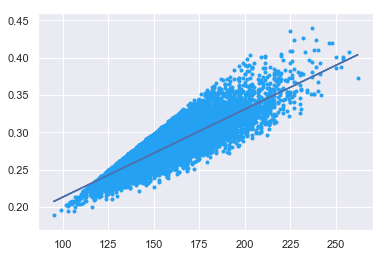

In [38]:
plt.scatter(df['hits'], df['avgs'], color='#24a1f2', marker='.')
plt.plot(x, regr.predict(x));